In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [4]:
df = df.iloc[:,1:]

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# preprocess + EDA + Feature Selection

In [8]:
import matplotlib.pyplot as plt

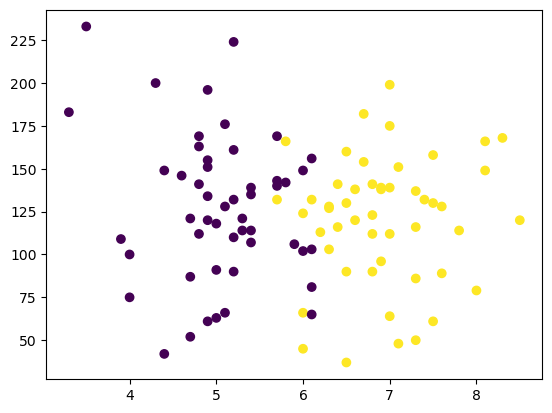

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# Extract input and output cols

In [11]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train test split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [16]:
X_train

,cgpa,iq
47,5.2,161.0
72,7.3,116.0
78,6.1,81.0
71,6.1,132.0
88,4.4,149.0
...,...,...
82,6.5,37.0
24,4.7,121.0
21,7.1,151.0
54,6.4,141.0


In [17]:
Y_train

47    0
72    1
78    0
71    1
88    0
     ..
82    1
24    0
21    1
54    1
45    1
Name: placement, Length: 90, dtype: int64

# Scale the values

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[-0.64051129,  0.88852993],
       [ 1.2658924 , -0.24630016],
       [ 0.17651886, -1.12894579],
       [ 0.17651886,  0.15719498],
       [-1.36676031,  0.58590857],
       [-0.64051129, -0.39761084],
       [-1.18519806,  0.51025323],
       [ 0.17651886, -0.57413996],
       [ 1.35667352,  0.15719498],
       [-0.82207355, -0.87676132],
       [-1.36676031, -2.1124652 ],
       [-0.45894904,  0.33372411],
       [-0.91285468, -0.14542637],
       [-0.18660565,  0.15719498],
       [ 1.2658924 , -1.00285355],
       [ 0.90276788,  0.30850566],
       [-1.09441693, -0.97763511],
       [ 2.17370367,  1.06505906],
       [ 0.99354901, -1.55765938],
       [-0.64051129,  2.47729206],
       [ 0.81198676,  0.384161  ],
       [-2.18379047,  2.70425807],
       [-1.0036358 ,  0.93896682],
       [ 1.53823578, -0.92719821],
       [ 1.44745465,  0.81287459],
       [-0.91285468, -1.63331472],
       [-0.18660565,  0.35894255],
       [ 1.71979803, -0.29673705],
       [ 1.08433014,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-1.09441693, -1.86028073],
       [-0.45894904, -0.29673705],
       [ 1.53823578,  0.0563212 ],
       [-0.0050434 , -0.49848462],
       [ 0.17651886, -1.53244093],
       [ 2.35526593, -0.14542637],
       [ 1.44745465, -1.63331472],
       [ 1.99214142,  1.01462216],
       [ 0.53964337, -0.90197977],
       [ 1.2658924 ,  0.28328722]])

# Train the model

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
clf = LogisticRegression()


In [32]:
clf.fit(X_train, Y_train)


LogisticRegression()

In [33]:
y_pred = clf.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [35]:
print(clf.coef_)
print(clf.intercept_)


[[ 3.2428423  -0.20520529]]
[-0.13861745]


In [36]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [38]:
Y_test

94    0
41    0
30    1
1     0
56    0
69    1
44    1
65    1
79    1
61    1
Name: placement, dtype: int64

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

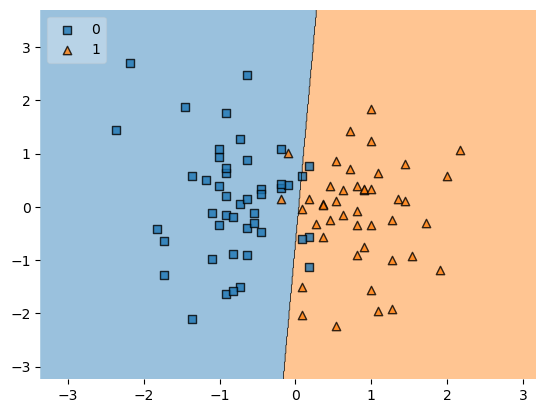

In [41]:
plot_decision_regions(X_train,Y_train.values, clf = clf, legend = 2)

# Evaluate the model/model selection

In [42]:
import pickle

In [43]:
pickle.dump(clf,open('model.pkl','wb'))

# Deploy the model